<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Первичный-анализ-данных" data-toc-modified-id="Первичный-анализ-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Первичный анализ данных</a></span></li><li><span><a href="#Проверка-правильности-расчета-выхода" data-toc-modified-id="Проверка-правильности-расчета-выхода-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка правильности расчета выхода</a></span></li><li><span><a href="#Недоступные-признаки" data-toc-modified-id="Недоступные-признаки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Недоступные признаки</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентраций-металлов-в-процессе" data-toc-modified-id="Изменение-концентраций-металлов-в-процессе-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентраций металлов в процессе</a></span></li><li><span><a href="#Сравнение-распределений-на-выборках" data-toc-modified-id="Сравнение-распределений-на-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределений на выборках</a></span></li><li><span><a href="#Проверка-суммарных-концентраций" data-toc-modified-id="Проверка-суммарных-концентраций-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка суммарных концентраций</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#sMAPE" data-toc-modified-id="sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>sMAPE</a></span></li><li><span><a href="#Формирование-выборок" data-toc-modified-id="Формирование-выборок-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Формирование выборок</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные:
* Изучить данные, проверить правильность расчета целевых признаков
* Предобработать данные
2. Провести исследовательский анализ данных:
* Проанализировать изменение концентраций в процессе концентрирования
* Проверить выборки на однородность
* Проверить адекватность данных
3. Построить и обучить модель:
* Сформировать выборки
* Обучить модели, наилучшую определить по гибридному sMAPE
* Протестировать выбранную модель

## Подготовка данных

### Первичный анализ данных

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.decomposition import PCA
from scipy.stats import randint
from sklearn.dummy import DummyRegressor

In [3]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [4]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [6]:
(df_train.isna().sum()/len(df_train)).mean()

0.003330725618885377

In [7]:
(df_train.isna().sum()/len(df_train)).max()

0.11343557848611209

**В трейне 14149 объектов, 86 признаков из них 2 целевых** (`final.output.recovery ` и `rougher.output.recovery`) без пропусков и 1 неинформативный для предсказаний (`date`). Все информативные признаки имеют числовой формат. Пропуски в среднем по признакам 3%, максимально - 11%

In [8]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [10]:
(df_test.isna().sum()/len(df_test)).mean()

0.0003210043870599565

In [11]:
(df_test.isna().sum()/len(df_test)).max()

0.004725897920604915

**В тесте 5290 объектов, 52 признака, нет целевых.** Есть столбец `date`. Пропусков меньше чем в трейне - в средним по признакам 0.3%, максимально 4%

In [12]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [13]:
df_full.duplicated().sum()

0

В полном датафрейме содержатся как тестовая, так и трейн выборки. Восстановить целевые признаки в тесте можно по этой табличке. Дубликатов не обнаружено.

### Проверка правильности расчета выхода

In [14]:
df_recov_check = pd.DataFrame()
df_recov_check['train'] = df_train['rougher.output.recovery']
df_recov_check['check'] = (
    df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au']) /
    (df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']))
)

In [15]:
df_recov_check.head()

,train,check
0,87.107763,0.871078
1,86.843261,0.868433
2,86.842308,0.868423
3,87.226430,0.872264
4,86.688794,0.866888


In [16]:
mean_absolute_error(df_recov_check['train'], df_recov_check['check']*100)

9.73512347450521e-15

Расчет recovery проведен верно

### Недоступные признаки

In [17]:
inaccessible_features_all = set(df_test.columns) ^ set(df_train.columns)
inaccessible_features_all

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [18]:
inaccessible_features = inaccessible_features_all - set(['rougher.output.recovery', 'final.output.recovery'])

34 признака которые есть в тесте но которых нету в трейне, очевидно, измеряются уже на производстве. Эти признаки(исключая целевые) нельзя подавать моделям для обучения.

In [19]:
inaccessible_features.union(set(['rougher.output.recovery', 'final.output.recovery']))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

### Предобработка

Добавим целевые признаки в тест, удалим лишние признаки, дропать `date` пока не будем. Пропуски заполним предыдущим значением

In [20]:
df_test = df_test.join(
    df_full[['date', 'rougher.output.recovery', 'final.output.recovery']].set_index('date'),
    on='date'
)

In [21]:
df_train.drop(columns=inaccessible_features, inplace=True)

In [22]:
df_test.shape

(5290, 55)

In [23]:
df_train.shape

(14149, 55)

In [24]:
df_test.fillna(method='ffill', inplace=True)
df_train.fillna(method='ffill', inplace=True)

## Анализ данных

### Изменение концентраций металлов в процессе 

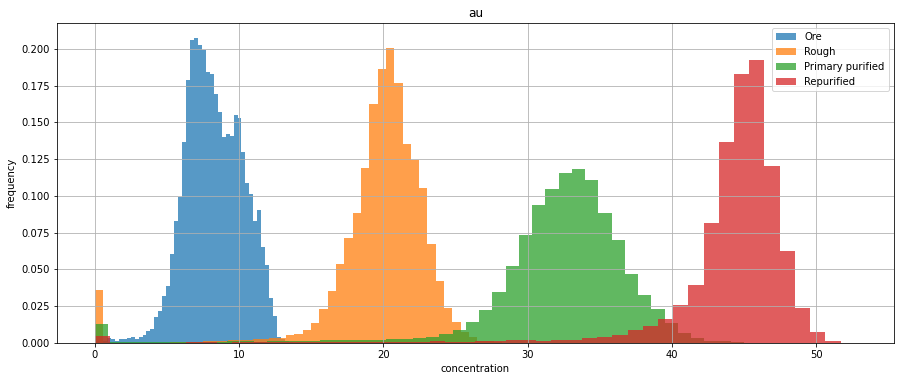

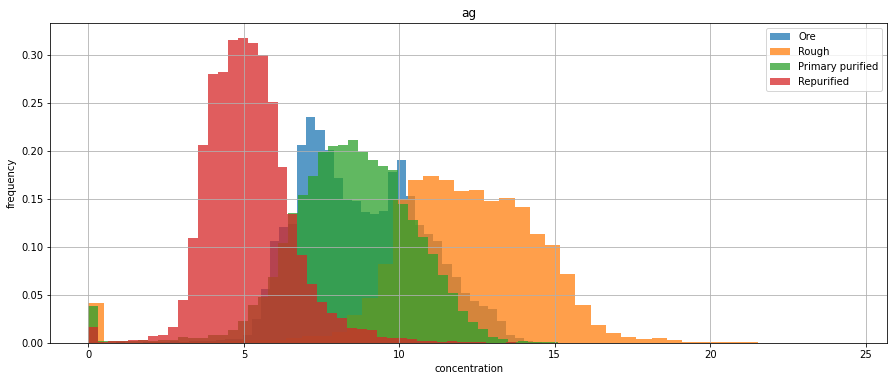

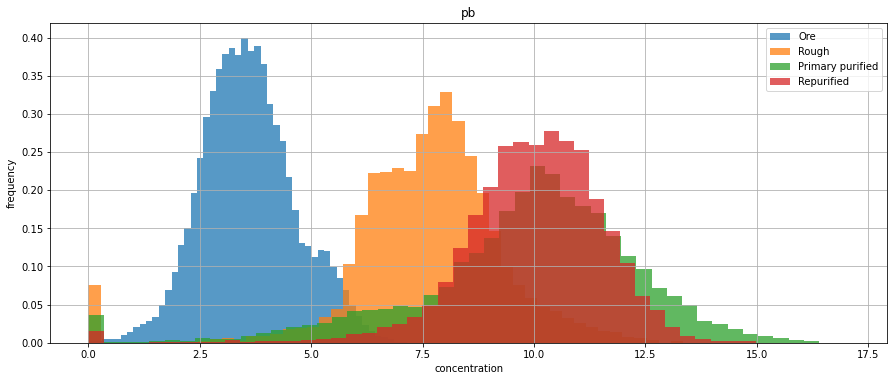

In [25]:
plot_columns = ['rougher.input.feed_', 'rougher.output.concentrate_',
                'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
plot_metals = ['au', 'ag', 'pb']

for i, me in enumerate(plot_metals):
    plt.figure(figsize=(15, 20))
    plt.subplot(3,1,i+1)
    for col in plot_columns:
        plt.hist(df_full[col+me], bins=50, density=True, alpha=0.75);
        plt.legend(['Ore', 'Rough', 
                    'Primary purified', 'Repurified'])

    plt.title(me)
    plt.xlabel('concentration')
    plt.ylabel('frequency')
    plt.grid()

Концентрация золота на каждом этапе увеличивается. Основная примесь - свинец, тоже увеличивает свое содержание. Серебро, в отличие от предыдущих двух металлов, сначала увеличивает свою концентрацию (этап грубой очистки), а затем уменьшает.

### Сравнение распределений на выборках

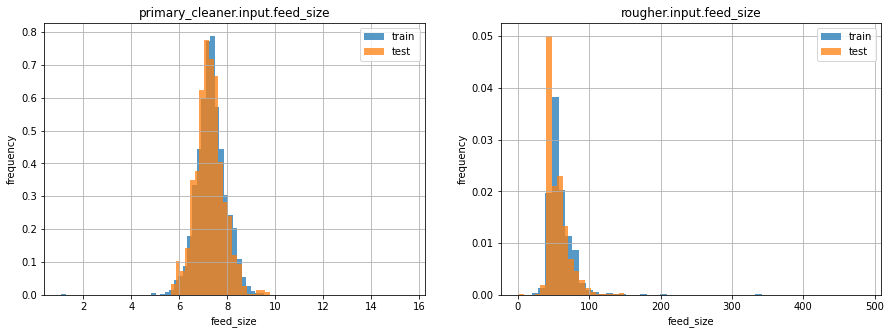

In [26]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.hist(df_train['primary_cleaner.input.feed_size'], bins=50, density=True, alpha=0.75);
plt.hist(df_test['primary_cleaner.input.feed_size'], bins=50, density=True, alpha=0.75);
plt.legend(['train', 'test'])
plt.title('primary_cleaner.input.feed_size')
plt.xlabel('feed_size')
plt.ylabel('frequency')
plt.grid()

plt.subplot(1,2,2)
plt.hist(df_train['rougher.input.feed_size'], bins=50, density=True, alpha=0.75);
plt.hist(df_test['rougher.input.feed_size'], bins=50, density=True, alpha=0.75);
plt.legend(['train', 'test'])
plt.title('rougher.input.feed_size')
plt.xlabel('feed_size')
plt.ylabel('frequency')
plt.grid()

Распределения гранул отличаются не сильно, данные однородны

### Проверка суммарных концентраций

In [27]:
df_concentrations = pd.DataFrame()

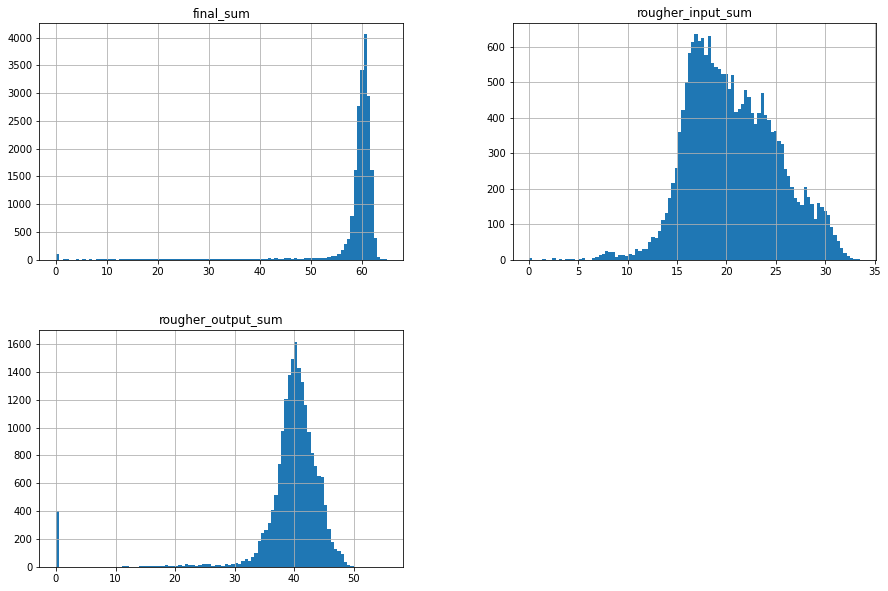

In [28]:
df_concentrations['date'] = df_full['date']
df_concentrations['final_sum'] = df_full[['final.output.concentrate_ag', 'final.output.concentrate_au',
                                         'final.output.concentrate_pb']].sum(axis=1)
df_concentrations['rougher_input_sum'] = df_full[['rougher.input.feed_ag', 'rougher.input.feed_au',
                                         'rougher.input.feed_pb']].sum(axis=1)
df_concentrations['rougher_output_sum'] = df_full[['rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
                                         'rougher.output.concentrate_pb']].sum(axis=1)

df_concentrations.hist(figsize=(15,10), bins = 100);

Видны нулевые концентрации. Это однозначно выбросы - не может быть так что на всех стадиях ничего нет. Эти значения необходимо удалить

In [29]:
date_to_keep = df_concentrations.query('not ((final_sum == 0) or (rougher_output_sum == 0))')['date']

In [30]:
df_test = df_test.query('date in @date_to_keep')
df_train = df_train.query('date in @date_to_keep')

In [31]:
df_test.drop(columns='date', inplace=True)
df_train.drop(columns='date', inplace=True)

## Модель

Обучать будем линейную регрессию, модель Лассо и случайный лес. Оценивать качество будем с помощью гибридной метрики smape

### sMAPE

$$sMAPE=\frac{1}{N}\sum_{i=1}^{N} \frac{|y_{i}-\hat{y}_{i}|} {(|y_{i}|+|\hat{y}_{i}|)/2}\cdot100\%$$

$$\text{Итоговое }sMAPE = 0.25\cdot sMAPE(rougher)+0.75\cdot sMAPE(final)$$

$$\text{Где }y_{i}\text{ - значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество}$$

$$\hat{y}_{i}\text{ - значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.}$$

$$N\text{ - количество объектов в выборке}$$

In [32]:
def smape(y_true, y_pred):
    return sum(abs(y_true-y_pred) / ((abs(y_true)+abs(y_pred))/2)) / len(y_pred) * 100

def smape_loss_func(y_true, y_pred):
    return 0.25*smape(y_true[:,0], y_pred[:,0]) + 0.75*smape(y_true[:,1], y_pred[:,1])
smape_loss = make_scorer(smape_loss_func, greater_is_better=False)

### Формирование выборок

In [33]:
X_train = np.asarray(df_train.drop(columns=['rougher.output.recovery', 'final.output.recovery']))
y_train = np.asarray(df_train[['rougher.output.recovery', 'final.output.recovery']])

X_test = np.asarray(df_test.drop(columns=['rougher.output.recovery', 'final.output.recovery']))
y_test = np.asarray(df_test[['rougher.output.recovery', 'final.output.recovery']])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Линейная регрессия


In [34]:
model = LinearRegression()
cross_val_score(model, X_train, y_train, cv=5, scoring=smape_loss).mean()

-10.0596020690936

Качество линейной регрессии сильно падает из-за мультиколлинеарности, исправим это

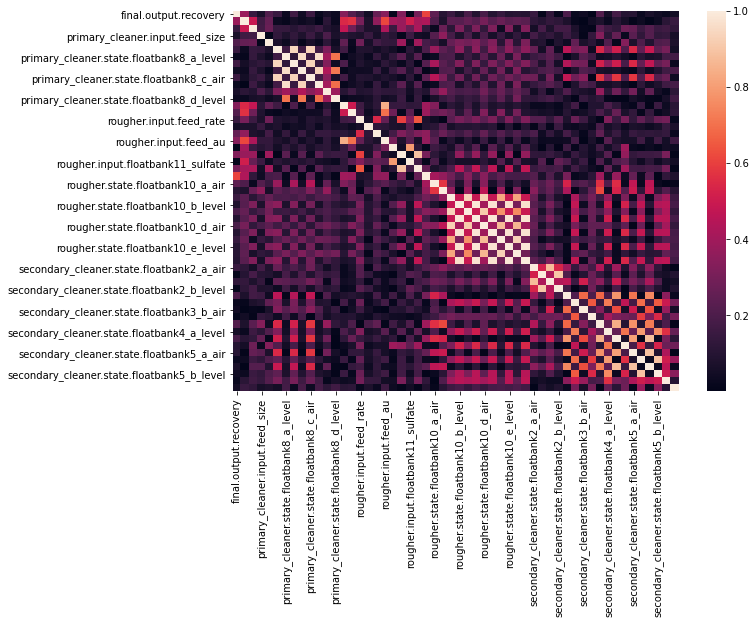

In [35]:
sns.heatmap(df_train.corr().abs())
plt.gcf().set_size_inches(10,7);

Избавимся от избыточных признаков PCA преобразованием

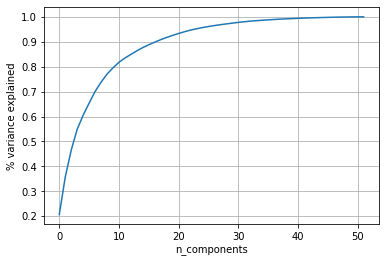

In [36]:
pca = PCA(n_components = X_train.shape[1])
pca_data = pca.fit_transform(X_train)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()

In [37]:
cumm_var_explained

array([0.20688479, 0.35745763, 0.46533436, 0.54894832, 0.60545721,
       0.65389514, 0.70077374, 0.73771217, 0.77022123, 0.79536266,
       0.81775804, 0.83462489, 0.84938313, 0.86372383, 0.87684485,
       0.888025  , 0.89846203, 0.90853283, 0.91740489, 0.92565132,
       0.93330297, 0.94030786, 0.94693042, 0.95205031, 0.95698041,
       0.96117728, 0.96497655, 0.96847887, 0.97167852, 0.97472106,
       0.9777177 , 0.98037342, 0.98270265, 0.98459093, 0.9863344 ,
       0.98796414, 0.98941789, 0.99081147, 0.99191026, 0.99296998,
       0.99398292, 0.99495351, 0.99573762, 0.9965197 , 0.99723096,
       0.99789712, 0.9984658 , 0.99890678, 0.99930655, 0.99967117,
       0.99987609, 1.        ])

In [38]:
pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

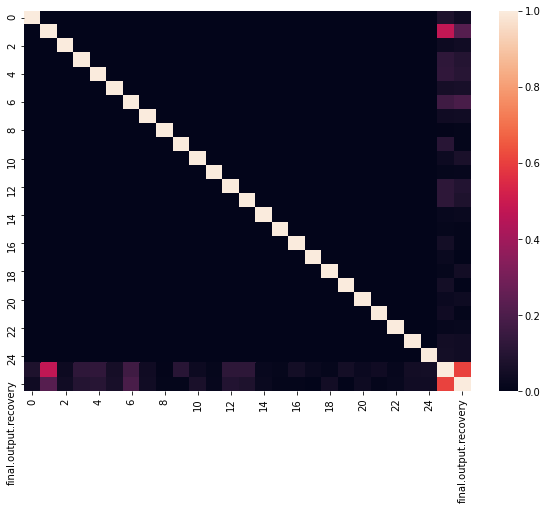

In [39]:
df_train_pca = pd.DataFrame(X_train_pca)
df_train_pca['rougher.output.recovery'] = df_train['rougher.output.recovery']
df_train_pca['final.output.recovery'] = df_train['final.output.recovery']

sns.heatmap(df_train_pca.corr().abs())
plt.gcf().set_size_inches(10,7);

In [40]:
model = LinearRegression()
cross_val_score(model, X_train_pca, y_train, cv=5, scoring=smape_loss).mean()

-8.79238237172441

Качество заметно улучшилось, посмотрим как проявит себя Лассо 

In [41]:
model = Lasso()

In [42]:
clf = GridSearchCV(model, {'alpha': list(np.linspace(0.4, 0.7, 21))}, scoring=smape_loss)
clf.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.4, 0.41500000000000004, 0.43, 0.445, 0.46,
                                   0.475, 0.49, 0.505, 0.52, 0.5349999999999999,
                                   0.55, 0.565, 0.58, 0.595, 0.61, 0.625,
                                   0.6399999999999999, 0.655,
                                   0.6699999999999999, 0.6849999999999999,
                                   0.7]},
             scoring=make_scorer(smape_loss_func, greater_is_better=False))

In [43]:
clf.best_score_

-8.558927178261417

In [44]:
clf.best_params_

{'alpha': 0.55}

Качество модели Лассо немного лучше. В дальнейшем можно удалить линейно незначимые столбцы

### Модель случайного леса

interval columns not set, guessing: ['final.output.recovery', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.output.recovery', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.fl

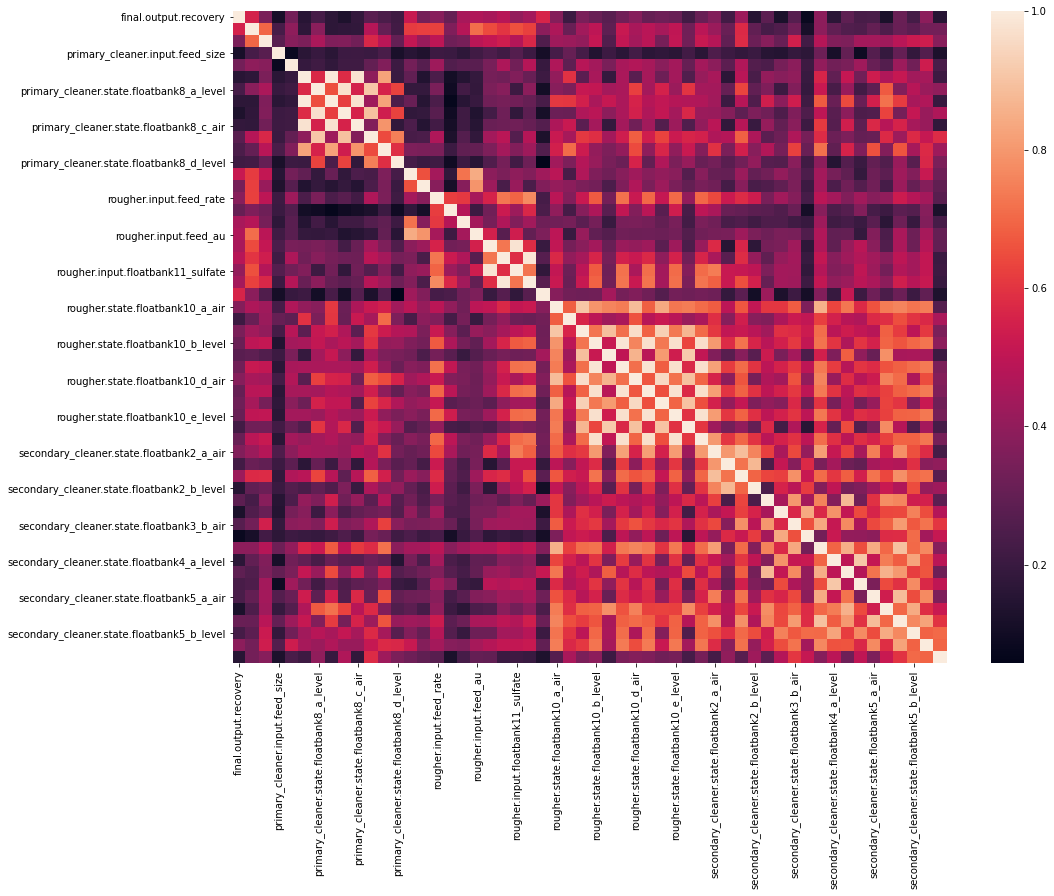

In [45]:
sns.heatmap(df_train.phik_matrix());
plt.gcf().set_size_inches(16,12);

Как видно по матрице корреляций Фика, много признаков коррелируют между собой, однако для деревянных моделей это не критично, а вот удалить слабо-коррелирующие к целевым признаки будет полезно, чтобы исключить переобучение на шумах. Если качество будет неудовлетворительным, то сделаем это

In [46]:
rs_space={'max_depth':list(np.arange(3, 16, step=3)),
          'n_estimators':np.arange(10, 210, step=50),
          'max_features':randint(1,7),
          'min_samples_leaf':randint(1,4),
          'min_samples_split':np.arange(2, 10, step=2)
          }

model = RandomForestRegressor()

clf = RandomizedSearchCV(model, rs_space, n_iter=10, scoring=smape_loss, n_jobs=-1)
clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [3, 6, 9, 12, 15],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd4668df580>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd466754850>,
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160])},
                   scoring=make_scorer(smape_loss_func, greater_is_better=False))

In [47]:
clf.best_params_

{'max_depth': 6,
 'max_features': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 160}

In [48]:
clf.best_score_

-8.423475866682084

Модель случайного леса показывает себя сходно.

### Тестирование модели

Выберем в пользу быстроты и интерпретируемостимодель Лассо и протестируем . 

In [49]:
model = Lasso(alpha=0.55)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
smape_loss_func(y_test, y_pred)

6.432050661803889

In [50]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)

smape_loss_func(y_test, dummy.predict(X_test))

7.766604067388502

Модель имеет хороший скор 6.42%. Для сравнения модель, которая выдает средняя имеет 7.76%. Качество отличное!

### Вывод

1. Изучили, проверили правильность данных. Заполнили пустые значения предыдущими. В тест добавили целевые признаки
2. Проанализировали данные на тесте и трейне, подтвердили их однородность. Исключили наблюдения с нулевыми суммарными концентрациями после очистки.
3. Обучили линейную модель/PCA, Лассо и случайный лес. Тестировали модель Лассо, так как sMAPE на трейне был схож со случайным лесом, а скорость скорость и простота в интерпретировании лучше . На тесте sMAPE 6.43%, у случайной модели 7.76% - отличный результат!